In [1]:
# run OM10 to draw the scatter
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import triangle

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# two different constructors
db_prev = om10.DB(catalog='../data/qso_mock.fits')
print db_prev.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

In [3]:
# two different constructors
db = om10.DB(catalog='../data/qso_mock.fits')
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

In [4]:
# paint the lenses with the previous methods
db_prev.paint(lrg_input_cat='../data/LRGo.txt',qso_input_cat='../data/QSOo.txt', synthetic=False)
print db_prev.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

In [5]:
db.paint(synthetic=True, target='lens')
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
      ...      ...  ...   ...      ... ...     ...     ... ...  ...    ...
113167635        0    2 1

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


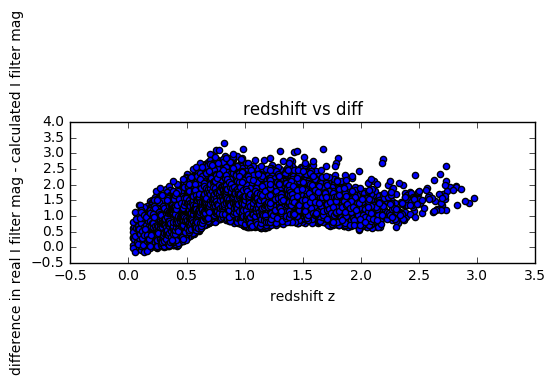

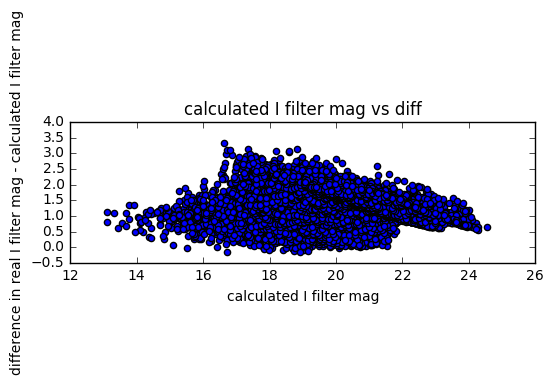

In [12]:
lens_APMAGI = db_prev.lenses['APMAG_I']
# APMAGI 정렬, lens_i_SDSS mag 정렬
lens_i = db.sample['I_SDSS']
lens_redshift = db.sample['ZLENS']
diff = lens_APMAGI - lens_i

plt.subplot(2, 1, 1)
plt.scatter(lens_redshift, diff)
plt.title('redshift vs diff')
plt.ylabel('difference in real I filter mag - calculated I filter mag')
plt.xlabel('redshift z')
plt.show()

plt.subplot(2, 1, 2)

plt.scatter(lens_i, diff)
plt.title('calculated I filter mag vs diff')
plt.ylabel('difference in real I filter mag - calculated I filter mag')
plt.xlabel('calculated I filter mag')